In [24]:
#This is solutions to problem set 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Define the functions here
#Here I vectorize the functions 
#The sigmoid function, this should return n row of values for n # of training data
def sigmoid(x,beta):
    return (1/(1+np.exp(-(x@beta))))
#This calculates the loglikelihood
def loglikelihood(y,x,beta):
    return (((x@beta).transpose())@y-np.ones((1,len(x)))@np.log(1+np.exp(x@beta)))
#The gradient, this should return k row of values for k # of beta parameters
def gradient(y,x,beta):
    return(x.transpose()@(sigmoid(x,beta)-y))
#The Hessian, this will be  n by n 
def hessian(y,x,beta):
    #Create a square matrix with o
    W=np.zeros((len(x),len(x)))
    #Fill the diagonal with (p(1-p))
    np.fill_diagonal(W,(sigmoid(x,beta)*(1-sigmoid(x,beta))))
    #Return the Hessian
    H=(x.transpose()@W)@x
    return H

In [25]:
#Import Dataset
dataset = pd.read_csv('social_network_data.csv')
#dataset.describe()
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [26]:
x=dataset.iloc[:,[2,3]].values #Get the Age and the Estimated Salary values
x1=np.insert(x,0,values=1,axis=1)
y1=dataset.iloc[:,[4]].values #My Newton Rhapson needs (n,1)
y=dataset.iloc[:,4].values #Built in needs (n)

In [27]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Since the range of values of the two parameters are large,so need to do feature scalling

In [28]:
#Import Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [29]:
#Split Training Set and Testing Set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5)

In [30]:
#Feature Scaling
sc_X=StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_test=sc_X.transform(x_test)

In [31]:
#Training the Logistic Model
classifier = LogisticRegression()
classifier.fit(x_train, y_train);

In [32]:
print('intercept:', classifier.intercept_)
print('coefficient:', classifier.coef_)

intercept: [-1.11464583]
coefficient: [[2.35545752 1.15575412]]


In [33]:
y_train1=np.array([y_train])
y_train1=y_train1.transpose()
y_train1.shape

(200, 1)

[[-1.32703359]
 [ 2.92460189]
 [ 1.46047447]]


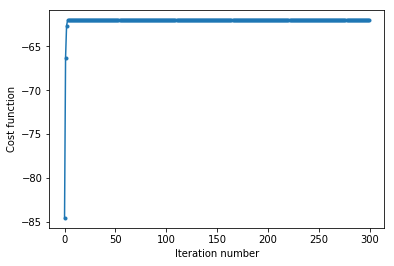

In [35]:
#Implement Newton Rhapson
#First insert 1
x_trainN=np.insert(x_train,0,values=1,axis=1)
N=x_trainN.shape[1]
#Initialize beta
beta=np.random.uniform(low=0,high=2,size=(N,1))
log_like=[]
it_n=[]
max_iter=300
#To implement this remember that we are using scalled data
for i in range(max_iter):
    #calculate the gradient
    fx=gradient(y_train1,x_trainN,beta)
    dfx=hessian(y_train1,x_trainN,beta)
    #update theta
    beta=beta-(np.linalg.inv(dfx))@fx # This is the rule,
    #Remember we are finding roots of the gradient, that is why need the Hessian
    #Calculate the value of the loglikelihood, these two are for plots
    cost=loglikelihood(y_train1,x_trainN,beta)[0]
    log_like.append(cost)
    it_n.append(i)
plt.plot(it_n, log_like,'.-')  
plt.xlabel('Iteration number')
plt.ylabel('Cost function')       
print(beta)

In [542]:
#Now to predict, remember to scale the data using the same rule that we used 
#in our training. 
x_test2=np.array([[32.0,150000.0]])
#Transform and insert a 1
x5=sc_X.transform(x_test2)
x6=np.insert(x5,0,values=1,axis=1)
#The probability is just the sigmoid function
sigmoid(x6,beta)

array([[0.56953095]])

In [543]:
#Predicting the Test Set Result
y_pred = classifier.predict(x_test)
#Create Confusion Matrix for Evaluation
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[119  12]
 [ 15  54]]
